<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

## 1. For the "Median value of owner-occupied homes" provide a boxplot

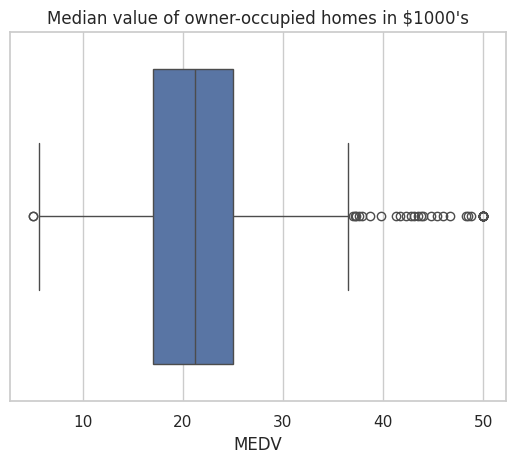

In [55]:
ax1 = sns.boxplot(x='MEDV', data=boston_df)
pyplot.title("Median value of owner-occupied homes in $1000's")
pyplot.show()

Explanation: The boxplox shows the median value of owner-occupied homes (MEDV). The variables is skewed to the left.

## Provide a bar plot for the Charles river variable

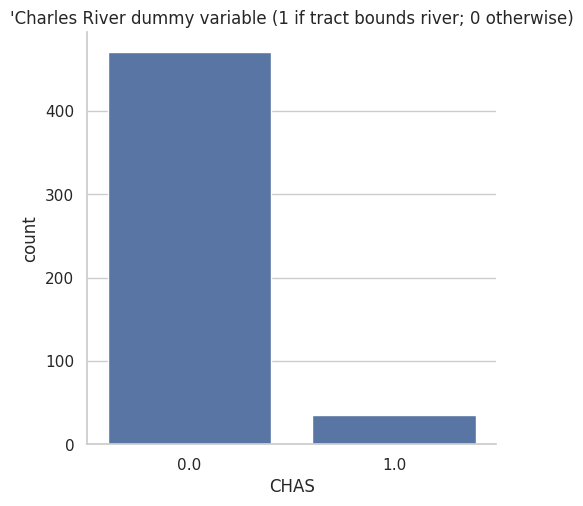

In [57]:
sns.catplot(x='CHAS', kind='count', data=boston_df)
pyplot.title("Charles River dummy variable (1 if tract bounds river; 0 otherwise)")
pyplot.show()

Explanation: The bar plot shows that most tracts bounds Charles river.

## Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

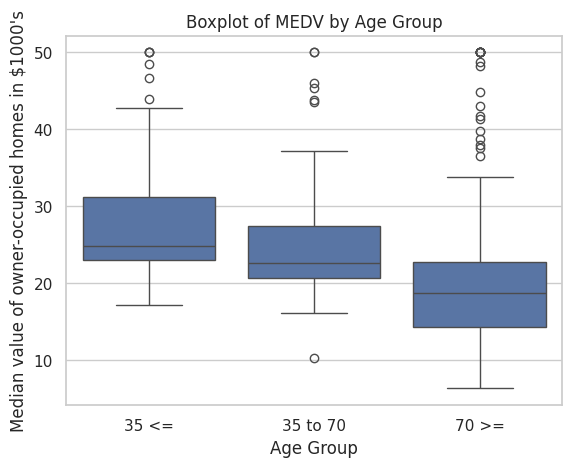

In [60]:

# Discretize the 'AGE' variable
boston_df['Age_Group'] = pd.cut(boston_df['AGE'],
                                bins=[0, 35, 70, 100],  # Adjust upper bin if needed to cover max age
                                labels=['35 <=', '35 to 70', '70 >='],
                                right=False)  # Adjust whether to include the right edge or not


# Create the boxplot
ax3 = sns.boxplot(x="Age_Group", y="MEDV", data=boston_df)
pyplot.title("Boxplot of MEDV by Age Group")
pyplot.xlabel("Age Group")
pyplot.ylabel("Median value of owner-occupied homes in $1000's")
pyplot.show()



Explanation: Individuals of 35 years or younger have the highest median for owner-occupied homes. Thr value of owner-occupied homes cedreases by age.

## Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

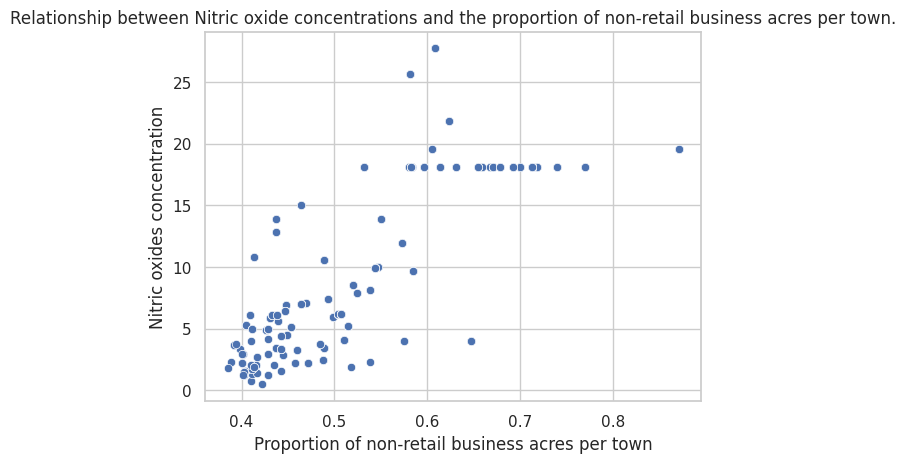

In [62]:
ax4 = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
ax4.set_title('Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.')
pyplot.xlabel('Proportion of non-retail business acres per town')
pyplot.ylabel("Nitric oxides concentration");
pyplot.show()






Explanation: There is a positive relationship. When We the proportion of non-retail business acres per town increases, so does the Nitric oxides concentration.

## Create a histogram for the pupil to teacher ratio variable

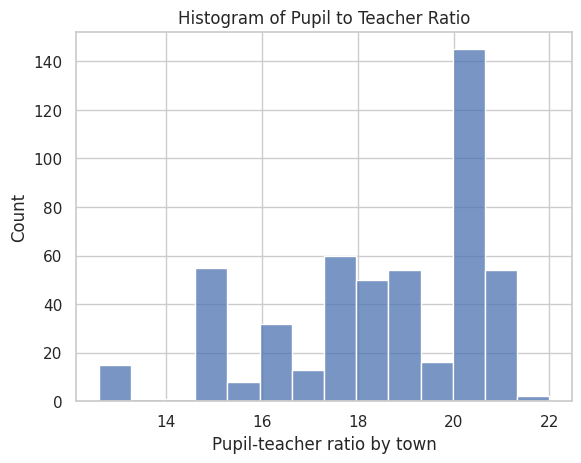

In [63]:
sns.histplot(x='PTRATIO', data=boston_df)
pyplot.title("Histogram of Pupil to Teacher Ratio")
pyplot.xlabel('Pupil-teacher ratio by town');
pyplot.show()


Explanation: The variable is not noramlly distributed. The most common ratio is about 20.

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Hypotheses:

H0: There is no difference in median value of houses bounded by the Charles river or not.

HA: There is a difference.

In [38]:
import pandas as pd
from scipy import stats

# Example loading data - ensure your dataframe is loaded correctly
# boston_df = pd.read_csv('path_to_your_boston_dataset.csv')

# Segmenting the data
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Performing the t-test
t_stat, p_value = stats.ttest_ind(chas_1, chas_0, equal_var=False)

# Output the results
print("T-statistic:", t_stat)
print("P-value:", p_value)



T-statistic: 3.113291312794837
P-value: 0.003567170098137517


Since the p-value is smaller than 0.05, we will reject the null hypothesis. There is significant evidence to suggest that properties adjacent to the Charles River have a higher median value compared to those that are not adjacent. 

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Hypotheses:

H0: All population means are equal for all unique propotions.
HA: At least one of the means differ

In [54]:
age_groups = []

for age in boston_df['AGE'].unique():

    age_groups.append(boston_df[boston_df['AGE'] == age]['MEDV'])

fstatistic, pvalue = scipy.stats.f_oneway(*age_groups)

print('fstatistic', fstatistic)

print('pvalue' , pvalue)


fstatistic 0.9840091646131573
pvalue 0.5539698276810093


Since the P-value > 0.05 there is not evidence that any unique proportion differs from the others. It is however questionable there are enough observations within each proportion for this analysis to make sense.

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Hypotheses:

H0: there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
HA: there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [45]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])


PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

Since the P-value > 0.05 the null hypothesis is rejected and one can conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Hypotheses:

H0: there is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes
HA: there is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes

In [46]:
X = sm.add_constant(boston_df['DIS'])  # Independent variable (weighted distances)
Y = boston_df['MEDV']  # Dependent variable (median home values)

# Fit the linear regression model
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

# Print the summary of the regression
print(model.summary())

# ANSWER:  1.0916

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 07 May 2024   Prob (F-statistic):           1.21e-08
Time:                        19:50:13   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there exists an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.

The coefficient of 1.0916 means that as weighted distances (DIS) increases by 1 median home values (MEDV) increases by 1.0916.